# Classificação de Qualidade de Vinhos - Árvore de Decisão

- Possuimos 2 datasets com vinhos tintos e brancos do norte de Portugal. O objetivo é fazer uma previsão da qualidade do vinho baseado nos testes químicos feitos
- Usaremos Árvore de Decisão para classificar os vinhos.

### Bibliotecas

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as pyplot
import pickle

### Importação das Variáveis

In [11]:
with open('redwine.pkl', 'rb') as f:
    X_redwine_train, y_redwine_train, X_redwine_test, y_redwine_test = pickle.load(f)

In [12]:
X_redwine_train.shape, y_redwine_train.shape

((1199, 11), (1199,))

In [13]:
X_redwine_test.shape, y_redwine_test.shape

((400, 11), (400,))

## Árvore de Decisão

In [14]:
arvore_redwine = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_redwine.fit(X_redwine_train, y_redwine_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Previsões

In [15]:
previsoes = arvore_redwine.predict(X_redwine_test)
previsoes

array([5, 5, 7, 5, 5, 6, 5, 6, 4, 5, 5, 5, 6, 4, 7, 6, 7, 4, 5, 4, 7, 6,
       6, 4, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 7, 7, 6, 3, 7, 6, 5, 6, 6, 7,
       6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 6, 5, 7, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 7, 6, 6, 4, 5,
       5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 3, 6, 5,
       6, 5, 8, 6, 5, 7, 6, 7, 6, 6, 5, 4, 5, 6, 7, 6, 5, 5, 5, 7, 4, 5,
       5, 5, 6, 5, 6, 5, 7, 5, 6, 6, 6, 3, 5, 6, 8, 6, 5, 5, 6, 5, 3, 5,
       6, 6, 4, 6, 6, 6, 6, 5, 7, 4, 5, 5, 6, 6, 6, 6, 6, 4, 4, 7, 6, 7,
       6, 7, 7, 5, 5, 8, 6, 6, 7, 5, 5, 6, 5, 6, 7, 6, 5, 6, 5, 5, 5, 5,
       7, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 7, 5, 6, 5, 5, 6, 6,
       5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5,
       5, 4, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 4, 5, 7, 6, 6, 5, 6,
       5, 3, 5, 6, 6, 7, 5, 6, 6, 6, 5, 6, 7, 6, 7, 5, 5, 6, 6, 5, 6, 5,
       6, 5, 7, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6,

In [16]:
y_redwine_test

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

### Resultados

In [17]:
print(f'Percentual de Acertos: {accuracy_score(y_redwine_test, previsoes):.2%}')

Percentual de Acertos: 60.25%


0.6025

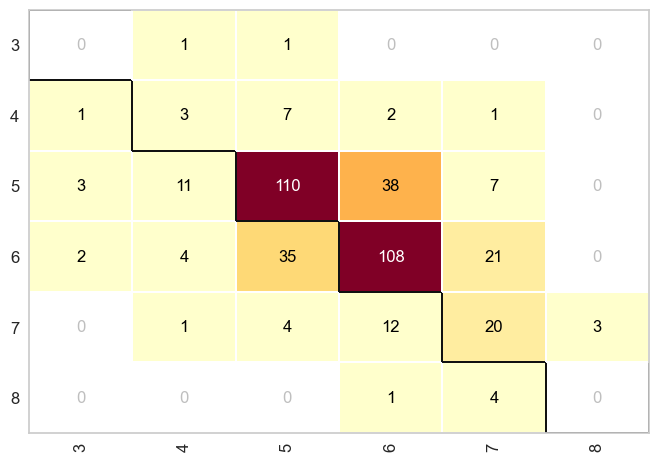

In [18]:
cm = ConfusionMatrix(arvore_redwine)
cm.fit(X_redwine_train, y_redwine_train)
cm.score(X_redwine_test, y_redwine_test)

In [19]:
print(classification_report(y_redwine_test, previsoes))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.15      0.21      0.18        14
           5       0.70      0.65      0.67       169
           6       0.67      0.64      0.65       170
           7       0.38      0.50      0.43        40
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.32      0.33      0.32       400
weighted avg       0.62      0.60      0.61       400



### A Árvore de Decisão não se mostrou muito eficiente para a solução deste problema, com uma precisão de apenas 60.25%.